# Make Calibration WAV Files
## By Terry Bondy, VA3TYB

In [18]:
printf(strftime ("Last updated: %A %e %B %Y %Z", localtime (time())))
%plot --format svg
# format long

Last updated: Tuesday 31 December 2019 UTC

In [19]:
sampleRate = 16000;
numPeriods = 15;
period = numPeriods;
Tshort = 0:1/sampleRate:1;
T = 0:1/sampleRate:period;

In [20]:
TestFreq = 721;
TestPhi = [ 0 ];
cosArg = 2*pi*TestFreq * Tshort + TestPhi;
Pilot = cos(cosArg);

In [21]:
Pilot = [(Pilot(1:end-1)' * ones(1, numPeriods))(:)', Pilot(1)];

In [22]:
RC = (1 - cos(2*pi*T/period))/2;

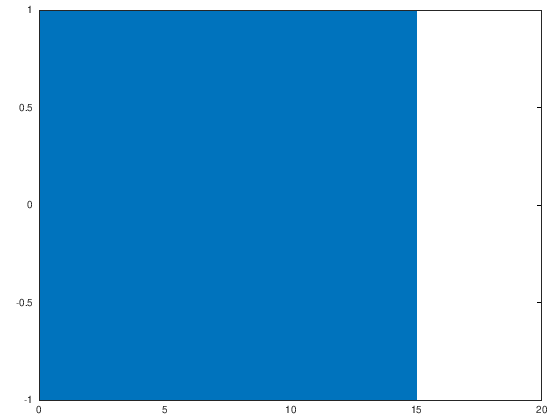

In [23]:
plot(T, Pilot)

In [24]:
for iter = 1:1:150
  printf("iter: %d\n", iter);
  Sigfilename = sprintf("Sig_%d.mat", iter);
  if (2 != exist (Sigfilename, "file"))
    break
  else
    load(Sigfilename)
  endif
  
  max(abs(Sig))
  iter++;
endfor

iter: 1
ans =  5.0877
iter: 2
ans =  8.4277
iter: 3
ans =  10.994
iter: 4
ans =  12.808
iter: 5
ans =  14.850
iter: 6
ans =  16.778
iter: 7
ans =  19.419
iter: 8
ans =  20.937
iter: 9
ans =  22.375
iter: 10
ans =  23.670
iter: 11
ans =  24.814
iter: 12
ans =  26.770
iter: 13
ans =  27.543
iter: 14
ans =  29.035
iter: 15
ans =  30.518
iter: 16
ans =  31.677
iter: 17
ans =  32.956
iter: 18
ans =  34.508
iter: 19
ans =  35.707
iter: 20
ans =  37.020
iter: 21
ans =  38.759
iter: 22
ans =  39.394
iter: 23
ans =  40.426
iter: 24
ans =  41.574
iter: 25
ans =  42.075
iter: 26
ans =  42.473
iter: 27
ans =  43.253
iter: 28
ans =  44.580
iter: 29
ans =  44.637
iter: 30
ans =  45.795
iter: 31
ans =  47.249
iter: 32
ans =  48.572
iter: 33
ans =  49.655
iter: 34
ans =  50.318
iter: 35
ans =  51.131
iter: 36
ans =  52.149
iter: 37
ans =  52.874
iter: 38
ans =  53.951
iter: 39
ans =  55.227
iter: 40
ans =  55.664
iter: 41
ans =  56.903
iter: 42
ans =  58.439
iter: 43
ans =  58.788
iter: 44
ans =  59.6

In [25]:
# Repeat Sig to expand it to numPeriods
Sig = [(Sig(1:end-1)' * ones(1, numPeriods))(:)', Sig(1)];

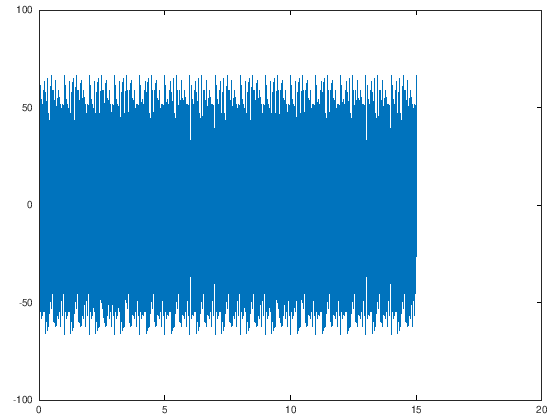

In [26]:
plot(T, Sig)

In [33]:
audiowrite("calibrateNew2.wav", [[Pilot .* RC](1:end-1), [Sig .* RC ./ max(abs(Sig))](1:end-1), Pilot .* RC], sampleRate, 
"Title", "Calibration file for Yaesu radioes.",
"Artist", "Terry Bondy, VA3TYB")

In [34]:
audioinfo("calibrateNew2.wav")

ans =

  scalar structure containing the fields:

    Filename = calibrateNew2.wav
    CompressionMethod = 
    NumChannels =  1
    SampleRate =  16000
    TotalSamples =  720001
    Duration =  45.000
    BitsPerSample =  16
    BitRate = -1
    Title = Calibration file for Yaesu radioes.
    Artist = Terry Bondy, VA3TYB
    Comment = 



In [35]:
[y, fs] = audioread("calibrateNew2.wav");
size(y)

ans =

   720001        1



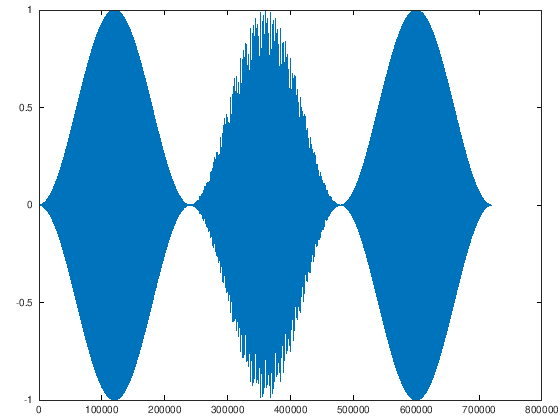

In [36]:
plot(y)